# SABR Model Test Code

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import imp
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(sys.path.index('')+1, 'D:/Github/PyFENG')
import pyfeng as pf
import option_models as opt
pf

<module 'pyfeng' from 'C:\\Python\\Anaconda3\\lib\\site-packages\\pyfeng\\__init__.py'>

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [3]:
# Parameters
strike = np.linspace(75,125,num=25) # Generate an arithmetic sequence of 25 numbers from 75 to 125
forward = 100
sigma = 0.2
texp = 1
vov = 0.5
rho = 0.25
beta = 1

In [4]:
# Create model
sabr_bsm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=beta)
sabr_bsm.__dict__

{'sigma': 0.2,
 'intr': 0.0,
 'divr': 0.0,
 'is_fwd': False,
 'vov': 0.5,
 'rho': 0.25,
 'beta': 1}

In [5]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward, texp)
bsm_vol = sabr_bsm.vol_smile(strike, forward, texp)

price, bsm_vol

(array([25.63112985, 23.75128418, 21.92436819, 20.15929844, 18.464919  ,
        16.84954379, 15.32049449, 13.88369006, 12.5433379 , 11.30176115,
        10.15937353,  9.11479108,  8.16505218,  7.30590775,  6.53214252,
         5.83789336,  5.21693965,  4.66295032,  4.1696811 ,  3.73112202,
         3.34159961,  2.99584057,  2.68900456,  2.4166934 ,  2.17494321]),
 array([0.20400581, 0.20266888, 0.20161986, 0.20085527, 0.2003692 ,
        0.20015312, 0.20019595, 0.20048427, 0.20100266, 0.20173418,
        0.20266088, 0.20376432, 0.20502604, 0.20642803, 0.20795302,
        0.20958477, 0.2113082 , 0.21310949, 0.21497615, 0.21689693,
        0.2188618 , 0.22086191, 0.22288945, 0.22493758, 0.22700034]))

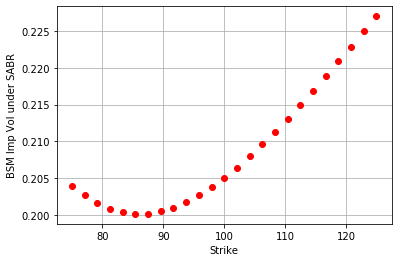

In [6]:
# volatility smile plot: try with different parameters
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (2) SABR for $\beta=0$

In [7]:
strike = np.linspace(75,125,num=25)
# strike = 1
forward = 100
sigma = 20
texp = 1
alpha = 0.5
rho = -0.25

In [8]:
sabr_norm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=0)
price = sabr_norm.price(strike, forward, texp)
nvol = sabr_norm.vol_smile(strike, forward, texp, model='norm')

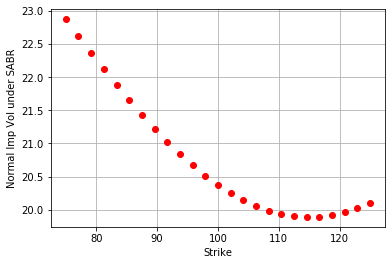

In [9]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (3) Smile calibration to 3 options

In [10]:
strike3 = np.array([90, 100, 110])
price3 = sabr_bsm.price(strike3, forward, texp)
vol3 = sabr_bsm.vol_smile(strike3, forward, texp)

price3, vol3

(array([13.60780137,  8.16505218,  4.76869334]),
 array([0.20057006, 0.20502604, 0.21274362]))

In [11]:
sabr_bsm.__dict__

{'sigma': 0.2,
 'intr': 0.0,
 'divr': 0.0,
 'is_fwd': False,
 'vov': 0.5,
 'rho': 0.25,
 'beta': 1}

In [12]:
# make sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(vol3, strike3, forward, texp, is_vol=True)

{'sigma': 0.2000000000001008,
 'vov': 0.4999999998672808,
 'rho': 0.24999999998258432}

In [13]:
# make sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(price3, strike3, forward, texp, is_vol=False)

{'sigma': 0.19999999979636335,
 'vov': 0.5000000129299839,
 'rho': 0.2499999894054446}

## 2. Pricing under MC method

In [14]:
strike = np.linspace(75,125,num=25)
forward = 100

In [15]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_mc = opt.sabr.ModelBsmMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': 0.25, 'beta': 1}


In [16]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_mc.price(strike, forward, texp)

# make sure the two prices are similar
np.set_printoptions(suppress=True)
price_hagan, price_mc

(array([25.63112985, 23.75128418, 21.92436819, 20.15929844, 18.464919  ,
        16.84954379, 15.32049449, 13.88369006, 12.5433379 , 11.30176115,
        10.15937353,  9.11479108,  8.16505218,  7.30590775,  6.53214252,
         5.83789336,  5.21693965,  4.66295032,  4.1696811 ,  3.73112202,
         3.34159961,  2.99584057,  2.68900456,  2.4166934 ,  2.17494321]),
 array([25.82726006, 23.9462753 , 22.11734161, 20.35056122, 18.65445952,
        17.03711248, 15.5080238 , 14.07065671, 12.72993203, 11.48764069,
        10.34164659,  9.29268792,  8.33416323,  7.46505824,  6.68195729,
         5.97909794,  5.35029677,  4.78952697,  4.28896632,  3.83960942,
         3.43910121,  3.08738288,  2.77852538,  2.50435667,  2.25983526]))

Repeat the same for beta = 0

In [17]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_mc = opt.sabr.ModelNormalMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.25, 'beta': 0}


In [18]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_mc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([26.59094359, 24.75316491, 22.95198866, 21.19221774, 19.47903728,
        17.81796274, 16.21475835, 14.6753216 , 13.20553214, 11.81106589,
        10.49717985,  9.26847793,  8.12867327,  7.08036718,  6.12486688,
         5.26206391,  4.4903905 ,  3.80686327,  3.2072135 ,  2.6860921 ,
         2.2373286 ,  1.85421785,  1.52980713,  1.25715953,  1.02957603]),
 array([26.58911926, 24.75404653, 22.95369199, 21.19997722, 19.49430129,
        17.84083902, 16.24368894, 14.70839153, 13.24825842, 11.85790108,
        10.54487657,  9.31808437,  8.18117663,  7.1366871 ,  6.18341715,
         5.32159881,  4.54787942,  3.86437813,  3.25912006,  2.73054273,
         2.27823835,  1.89099367,  1.56349165,  1.28803308,  1.05978108]))

## 3. Pricing under conditional MC method

In [19]:
strike = np.linspace(75,125,num=25)
forward = 100

In [20]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_cmc = opt.sabr.ModelBsmCondMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': 0.25, 'beta': 1}


In [21]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_cmc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.63112985, 23.75128418, 21.92436819, 20.15929844, 18.464919  ,
        16.84954379, 15.32049449, 13.88369006, 12.5433379 , 11.30176115,
        10.15937353,  9.11479108,  8.16505218,  7.30590775,  6.53214252,
         5.83789336,  5.21693965,  4.66295032,  4.1696811 ,  3.73112202,
         3.34159961,  2.99584057,  2.68900456,  2.4166934 ,  2.17494321]),
 array([25.75246319, 23.87441123, 22.04924911, 20.28574024, 18.59255381,
        16.97782384, 15.4487074 , 14.010994  , 12.66881249, 11.42446676,
        10.2784106 ,  9.22935177,  8.27445895,  7.40963649,  6.62983046,
         5.9293341 ,  5.3020687 ,  4.74182475,  4.24245654,  3.79802953,
         3.40292424,  3.05190258,  2.74014379,  2.46325681,  2.21727538]))

Repeat the same for beta = 0

In [22]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_cmc = opt.sabr.ModelNormalCondMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.25, 'beta': 0}


In [23]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_cmc.price(strike, forward, texp)
    
# make sure the two prices are similar
price_hagan, price_mc

(array([26.59094359, 24.75316491, 22.95198866, 21.19221774, 19.47903728,
        17.81796274, 16.21475835, 14.6753216 , 13.20553214, 11.81106589,
        10.49717985,  9.26847793,  8.12867327,  7.08036718,  6.12486688,
         5.26206391,  4.4903905 ,  3.80686327,  3.2072135 ,  2.6860921 ,
         2.2373286 ,  1.85421785,  1.52980713,  1.25715953,  1.02957603]),
 array([26.51718857, 24.68283131, 22.88554633, 21.13014828, 19.42181855,
        17.76604935, 16.16855819, 14.63516985, 13.17166405, 11.78359118,
        10.47606147,  9.25351858,  8.11951249,  7.07649096,  6.12563032,
         5.26672539,  4.49815413,  3.81692489,  3.2188048 ,  2.6985181 ,
         2.24999485,  1.86664564,  1.54163695,  1.26814468,  1.03956915]))

## Compare the MC variance between brute-force MC and conditional MC
For this, you should not use the random number seed

In [24]:
# beta = 1
from tqdm import tqdm
n = 100
price_bsm_mc = np.zeros([n,len(strike)])
price_bsm_cmc = np.zeros([n,len(strike)])
for i in tqdm(range(n)):
    price_bsm_mc[i:] = sabr_bsm_mc.price(strike, forward, texp, seed=None)
    price_bsm_cmc[i:] = sabr_bsm_cmc.price(strike, forward, texp, seed=None)

price_bsm_mc.var(axis=0), price_bsm_cmc.var(axis=0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:07<00:00,  1.47it/s]


(array([0.04604084, 0.04495149, 0.04368499, 0.04217256, 0.04053137,
        0.03872763, 0.0368219 , 0.03477936, 0.03262499, 0.03058194,
        0.02866339, 0.02670293, 0.02479684, 0.0231248 , 0.02153588,
        0.02005021, 0.01854176, 0.01700615, 0.01550914, 0.01405827,
        0.01277911, 0.01172393, 0.01079065, 0.00991616, 0.00910938]),
 array([0.00307162, 0.00312382, 0.00317293, 0.00321514, 0.00324616,
        0.0032616 , 0.00325744, 0.00323049, 0.00317881, 0.00310199,
        0.00300117, 0.0028789 , 0.00273885, 0.00258532, 0.00242286,
        0.00225588, 0.00208833, 0.00192358, 0.00176429, 0.00161242,
        0.00146932, 0.0013358 , 0.00121221, 0.00109857, 0.00099466]))

In [25]:
# beta = 0
n = 100
price_norm_mc = np.zeros([n,len(strike)])
price_norm_cmc = np.zeros([n,len(strike)])
for i in tqdm(range(n)):
    price_norm_mc[i:] = sabr_norm_mc.price(strike, forward, texp, seed=None)
    price_norm_cmc[i:] = sabr_norm_cmc.price(strike, forward, texp, seed=None)

price_norm_mc.var(axis=0), price_norm_cmc.var(axis=0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.14it/s]


(array([0.03300353, 0.03188357, 0.03061717, 0.02922263, 0.02775432,
        0.0262388 , 0.02460491, 0.02294483, 0.02124916, 0.01961596,
        0.01786304, 0.01610557, 0.01439446, 0.01278502, 0.01135844,
        0.01008357, 0.00896692, 0.007837  , 0.00675292, 0.00583438,
        0.00497735, 0.00415414, 0.00344045, 0.00282123, 0.00231045]),
 array([0.00078171, 0.00069183, 0.00060472, 0.00052184, 0.00044468,
        0.00037465, 0.00031301, 0.0002607 , 0.00021829, 0.0001858 ,
        0.00016269, 0.00014785, 0.00013965, 0.00013614, 0.00013524,
        0.00013502, 0.00013389, 0.00013078, 0.0001252 , 0.00011717,
        0.00010712, 0.00009572, 0.00008368, 0.00007171, 0.00006034]))